# Ali Foroozmand

# Homework 2


## Bayesian Probabilities

"There are two main schools of thought on the application of probability theory, and they differ fundamentally on what a probability actually is. There is the frequentist interpretation (sometimes referred to as classical or orthodox), and the Bayesian interpretation (sometimes referred to as modern or subjective).

*Frequency definition*: this says that probability is the relative frequency of events in the 'long run'. Consider an experiment in which $n$ events are observed, and some of these event are of type $X$. The probability of $X$ is the relative frequency that event $X$ occurs in an infinite sequence:

$$P(X) = \lim_{n \rightarrow \infty} \frac{\text{number of times event X occurs in } n \text{ experiments}}{n}$$

Within this scheme it is valid to assign probabilities to things such as radioactive decays, lottery draws and coin flips.

By contrast, it is not meaningful to consider the probability that it will rain on a certain date, because that date will only happen once and cannot be repeated. Likewise, one cannot assign a probability to hypotheses about the mass of Saturn, or whether an asteroid impact caused a mass extinction 65 million years ago. Saturn has a mass that is not intrinsically random but it is uncertain (to us).

*Bayesian definition*: The Bayesian probability is interpreted more broadly as a model for uncertainty. It allows probabilities to be used to quantitatively handle (aleatory) randomness and (epistemological) uncertainty. *As such, it is valid to consider the probability for a hypothesis, and interpret this as a measure of uncertainty*. Our knowledge of the hypothesis is not random, but it is uncertain.

Within the Bayesian scheme, it is valid to consider the probability that it will rain on a certain date, the probability for the hypothesis that an asteroid impact was responsible for the Cretaceous-Paleocene extinction, and assign a probability function to the mass of Saturn. These probabilities do not reflect the relative frequencies of events occurring; instead they reflect a quantitative assessment of our uncertainty about them, given the available evidence (data) and prior knowledge of the situation." 

Taken from *Scientific Inference: Learning from Data by Simon Vaughan pp.90-91*.

"To emphasize this last point, that a probability represents a state of knowledge rather than a physical real entity, consider the following example of Jaynes (1989). We are told that a dark bag contains five red balls and seven green ones. If this bag is shaken well, and a ball selected at "random", then most of us would agree that the probability of drawing a red ball is 5/12 and the probability of drawing a green one is 7/12. If the ball is not returned to the bag, then it seems reasonable that the probability of obtaining a red or green ball on the second draw will depend on the outcome of the first (because there will be one less red or green ball left in the bag).

Now suppose that we are not told the outcome of the first draw, but are given the result of the second one. Does the probability of the first draw being red or green change with the knowledge of the second? Initially, many of us would be inclined to say 'no': at the time of the first draw, there were still 5 red balls and 7 green ones in the bag; so, the probabilities for red and green should still be 5/12 and 7/12 irrespective of the outcome of the second draw. The error in this argument becomes obvious if we consider the extreme case of a bag containing only one red and one green ball. Although the second draw cannot affect the first in a physical sense, a knowledge of the second result does influence what we can infer about the outcome of the first one: if the second was green, then the first one must have been red; and vice versa. Thus (conditional) probabilities represent logical connections rather than causal ones."

Taken from *Data Analysis. A Bayesian Tutorial. Second Edition by D.S. Sivia. pp. 10-11*.

## Evolution of the Bias Weighting

"Most scientist, face the following situation: Given that certain effects have been observed, what is (are) the underlying cause(s)? To Take a simple example, suppose that ten flips of a coin yielded seven heads: is it a fair coin or a biased one? By fair, we mean that we would be prepared to lay an even 50:50 bet on the outcome of a flip being a head or a tail."

Let's solve a similar problem using a numerical simulation. We have a coin from a Casino and we want to know if it is fair or not. If we denote the bias-weighting by H, then H = 0 and H = 1 can represent a coin which produce a tail or a head on every flip, respectively.

Our inference about the fairness of this coin is summarised by the conditional pdf: P(H|data). To estimate the posterior pdf, we need to use Bayes’ theorem: 

$$P(data|H) \propto P(H|data) \times P(H)$$

Note that we have omitted the denominator P(data) as it does not involve the bias-weighting explicitly. The prior pdf, P(H) represents what we know about the coin. Since we don’t know anything about the coin, and we haven’t done any flip, a simple probability assignment which reflects this is a uniform, or flat, pdf:

\begin{equation}
P(H) = 
\begin{cases}
1, & 0\leq H \leq 1 \\
0, & \text{otherwise}
\end{cases}
\end{equation}

This prior state of knowledge is modified by the data through the likelihood function: P(data|H). It is a measure of the chance that we would have obtained the data that we actually observed, if the value of the bias-weighting was given. If the flips of the coins were independent events, then the probability of obtaining the data ”R heads in N flips” is given by the binomial distribution:

$$P(data|H) \propto H^R \times (1-H)^{N-R}$$

The product of the equations yields the posterior pdf that we require. It represents the state of knowledge about
the nature of the coin given the data. To get a feel for this result, it is instructive to see how this pdf evolves as we obtain more and more data pertaining to the coin.

![alt](flips0heads0.png)
![alt](flips1heads1.png)
![alt](flips2heads2.png)
![alt](flips3heads2.png)

### Question 1: Write a computer program that simulates the flip of a coin (for 1, 10, 100 and 1000 flips) with a bias H$_{heads}$, and generates similar plots for: 

- H$_{heads}$ = 0.5 (a fair coin)

- H$_{heads}$ = 1 (a coint with two heads!)

- H$_{heads}$ = 0.25 (equivalent to a very strange tetrahedral coin with tail on three sides and heads on one)

### Hint: The probability of obtaining the data "k heads in n flips" with a bias H is given by the binomial distribution: 

$$P(data|H_{heads}) \propto P(H_{heads}|data) = n!/(k! \times (n-k)!) \times H_{heads}^k \times (1-H_{heads})^{n-k}$$


# For H = .25

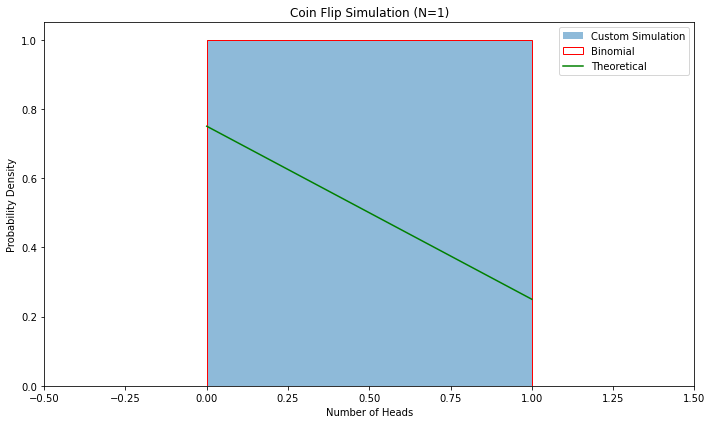

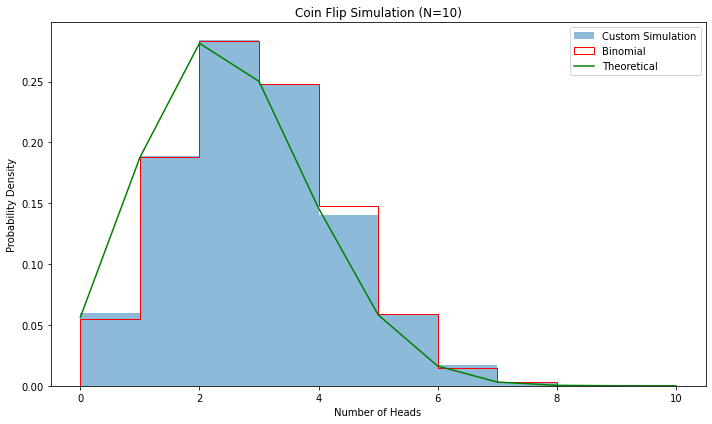

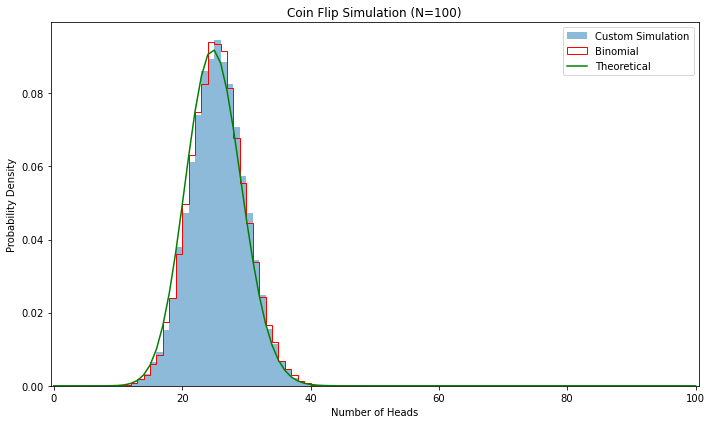

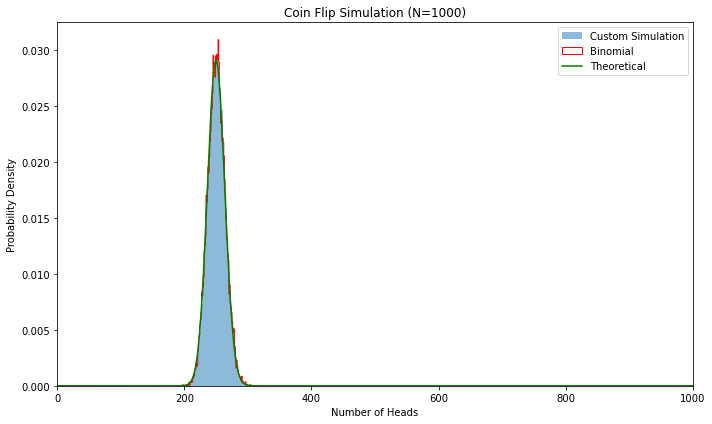

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

rng = np.random.default_rng()

def Coinflips(N, H):
    answer = rng.uniform(size=N)
    success = np.where(answer < H, 1, 0)
    return np.sum(success)

H = 0.25
num = 20000

for i in range(4):
    N = 10 ** i
    
  
    ks = np.array([Coinflips(N, H) for _ in range(num)])
    ks2 = rng.binomial(N, H, size=num)
    ints = np.arange(N + 1) 
    plt.figure(figsize=(10, 6))
    

    plt.hist(ks, bins=ints - 0, density=True, alpha=0.5, label='Custom Simulation')
    plt.hist(ks2, bins=ints - 0, density=True, histtype='step', label='Binomial', color='red')

    prob = comb(N, ints) * H ** ints * (1 - H) ** (N - ints)
    plt.plot(ints, prob, '-', color='green', label='Theoretical')

    plt.title(f'Coin Flip Simulation (N={N})')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability Density')
    plt.xlim(-0.5, N + 0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


# For H = .5

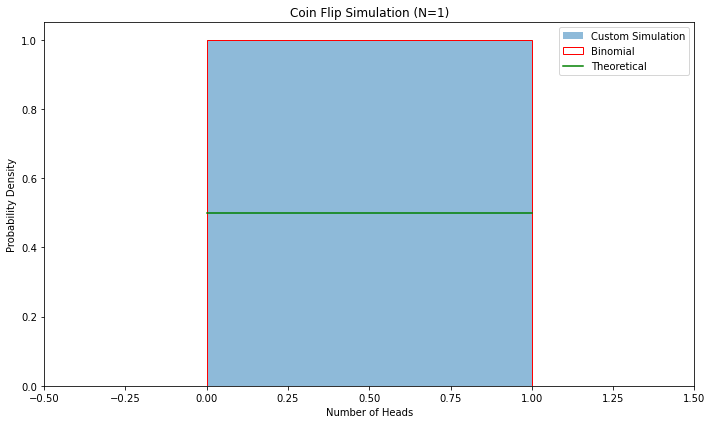

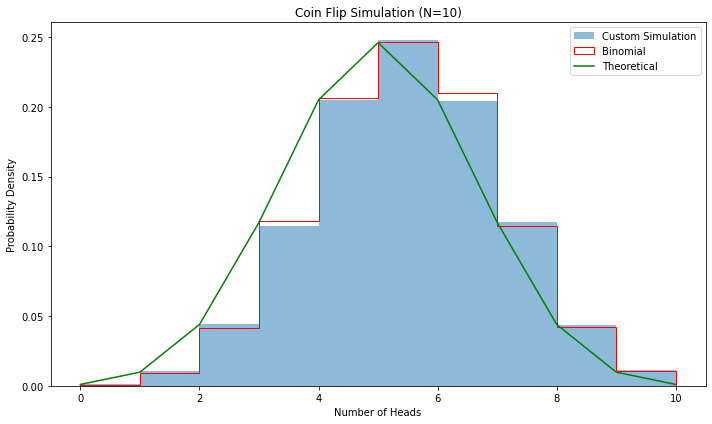

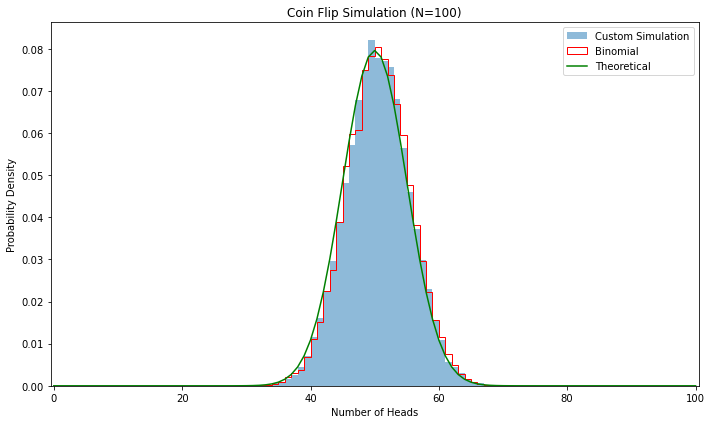

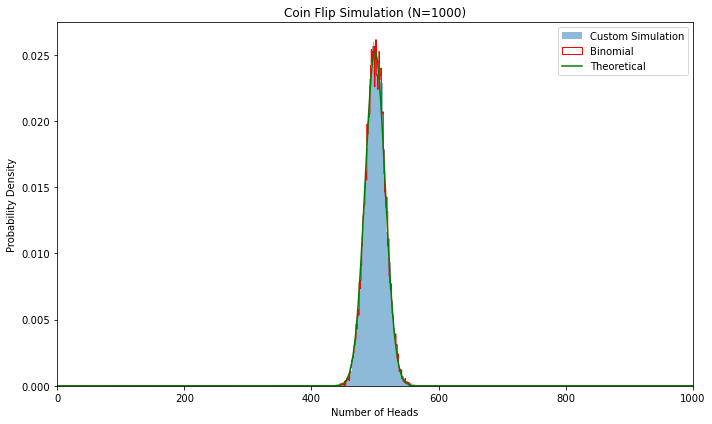

In [2]:
H = .5
num = 20000

for i in range(4):
    N = 10 ** i
    
  
    ks = np.array([Coinflips(N, H) for _ in range(num)])
    ks2 = rng.binomial(N, H, size=num)
    ints = np.arange(N + 1) 
    plt.figure(figsize=(10, 6))
    

    plt.hist(ks, bins=ints, density=True, alpha=0.5, label='Custom Simulation')
    plt.hist(ks2, bins=ints , density=True, histtype='step', label='Binomial', color='red')

    prob = comb(N, ints) * H ** ints * (1 - H) ** (N - ints)
    plt.plot(ints, prob, '-', color='green', label='Theoretical')

    plt.title(f'Coin Flip Simulation (N={N})')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability Density')
    plt.xlim(-0.5, N + 0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


# For H = 1

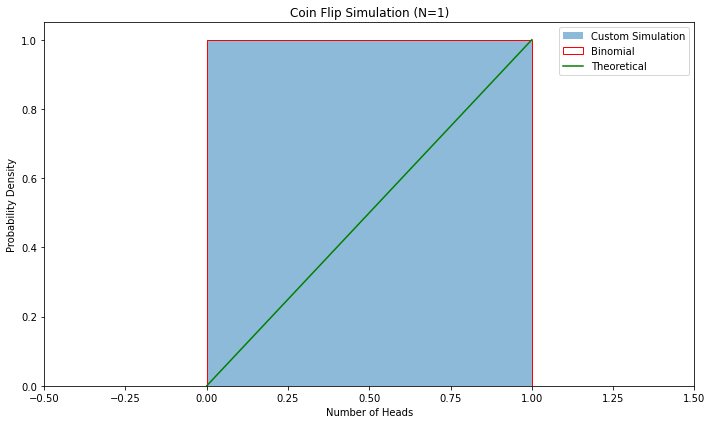

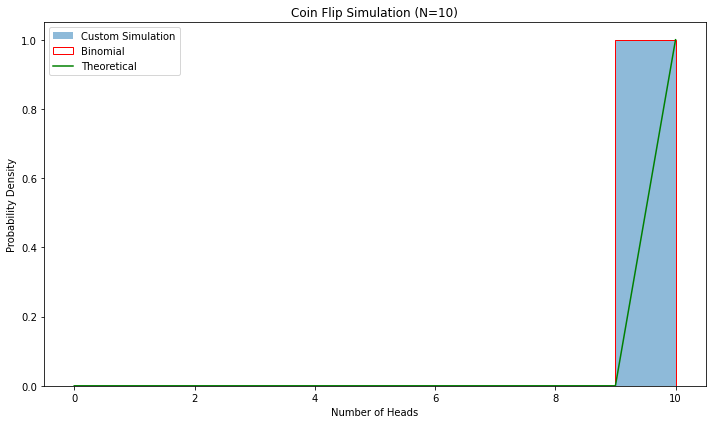

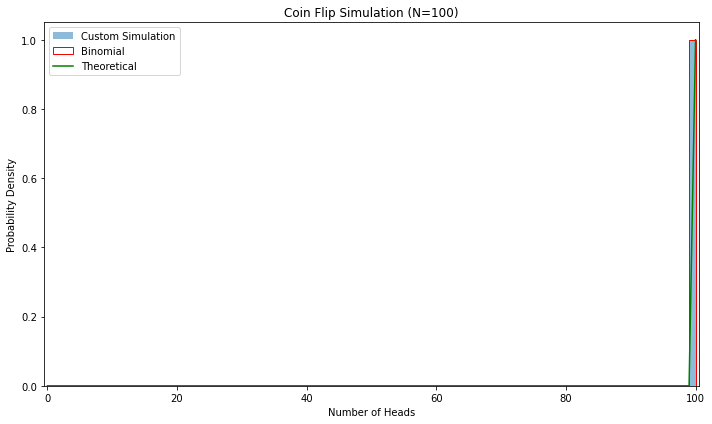

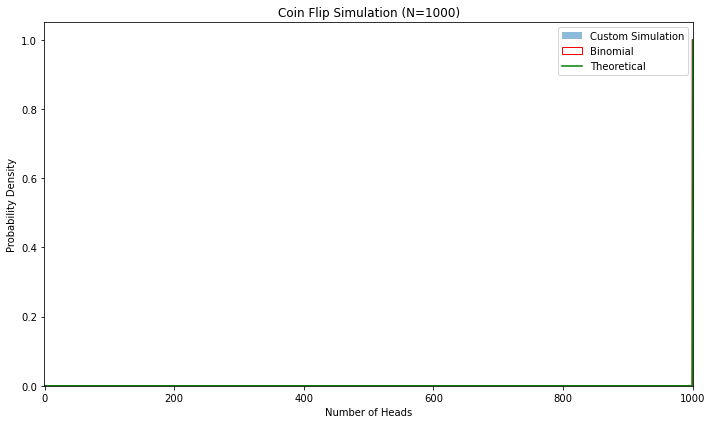

In [3]:
H = 1
num = 20000

for i in range(4):
    N = 10 ** i
    
  
    ks = np.array([Coinflips(N, H) for _ in range(num)])
    ks2 = rng.binomial(N, H, size=num)
    ints = np.arange(N + 1) 
    plt.figure(figsize=(10, 6))
    

    plt.hist(ks, bins=ints , density=True, alpha=0.5, label='Custom Simulation')
    plt.hist(ks2, bins=ints , density=True, histtype='step', label='Binomial', color='red')

    prob = comb(N, ints) * H ** ints * (1 - H) ** (N - ints)
    plt.plot(ints, prob, '-', color='green', label='Theoretical')

    plt.title(f'Coin Flip Simulation (N={N})')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability Density')
    plt.xlim(-0.5, N + 0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()


## Question 2: At the end of the 1000 flips, what input bias do you recover? What type of pdf do you find?

In [6]:
N = 1000
H = [0.5, 1.0, 0.25]

for bias in H:
    flips = Coinflips(N, bias)
    num_heads = np.sum(flips)
    print(f"With H : {bias}, Number of Heads: {num_heads}")


With H : 0.5, Number of Heads: 487
With H : 1.0, Number of Heads: 1000
With H : 0.25, Number of Heads: 265


In [7]:
# the type of pdf for large n (flips) can be normal distribution, wich we can see in the upper result roughly. 